## DSEER Bootcamps 2022
# Demystifying Machine Learning Day 1: Random Forest
Sam Lapp; she/her (an ML practitioner, but not an expert)
<br>
sglapp@uchicago.edu
<br>


## Welcome! You can think of today as a mini thesis of my experience learning how to use machine learning properly over the past year.

# My teaching philosophy for today:

1. We're giving you the skeleton (the framework) of understanding onto which you can 'pack on meat' later
2. Do first, then understand why (understanding why is still important of course!) 

(I want to get you all comfortable with how to train and test a random forest first! The idea is that you can then play around with it on your own and have a better idea of what to google to increase your understanding of the algorithm and its parameters! It is still important to understand what's happening in the algorithm though, to some extent! I am teaching this workshop day from a practical perspective. I am not (and presumably you are not) here to study machine learning itself, but rather to use it responsibly. It is a tool, just like other statistical tools like linear regression for example are tools used in science!

# Today we're focusing on *supervised* machine learning (ML) 

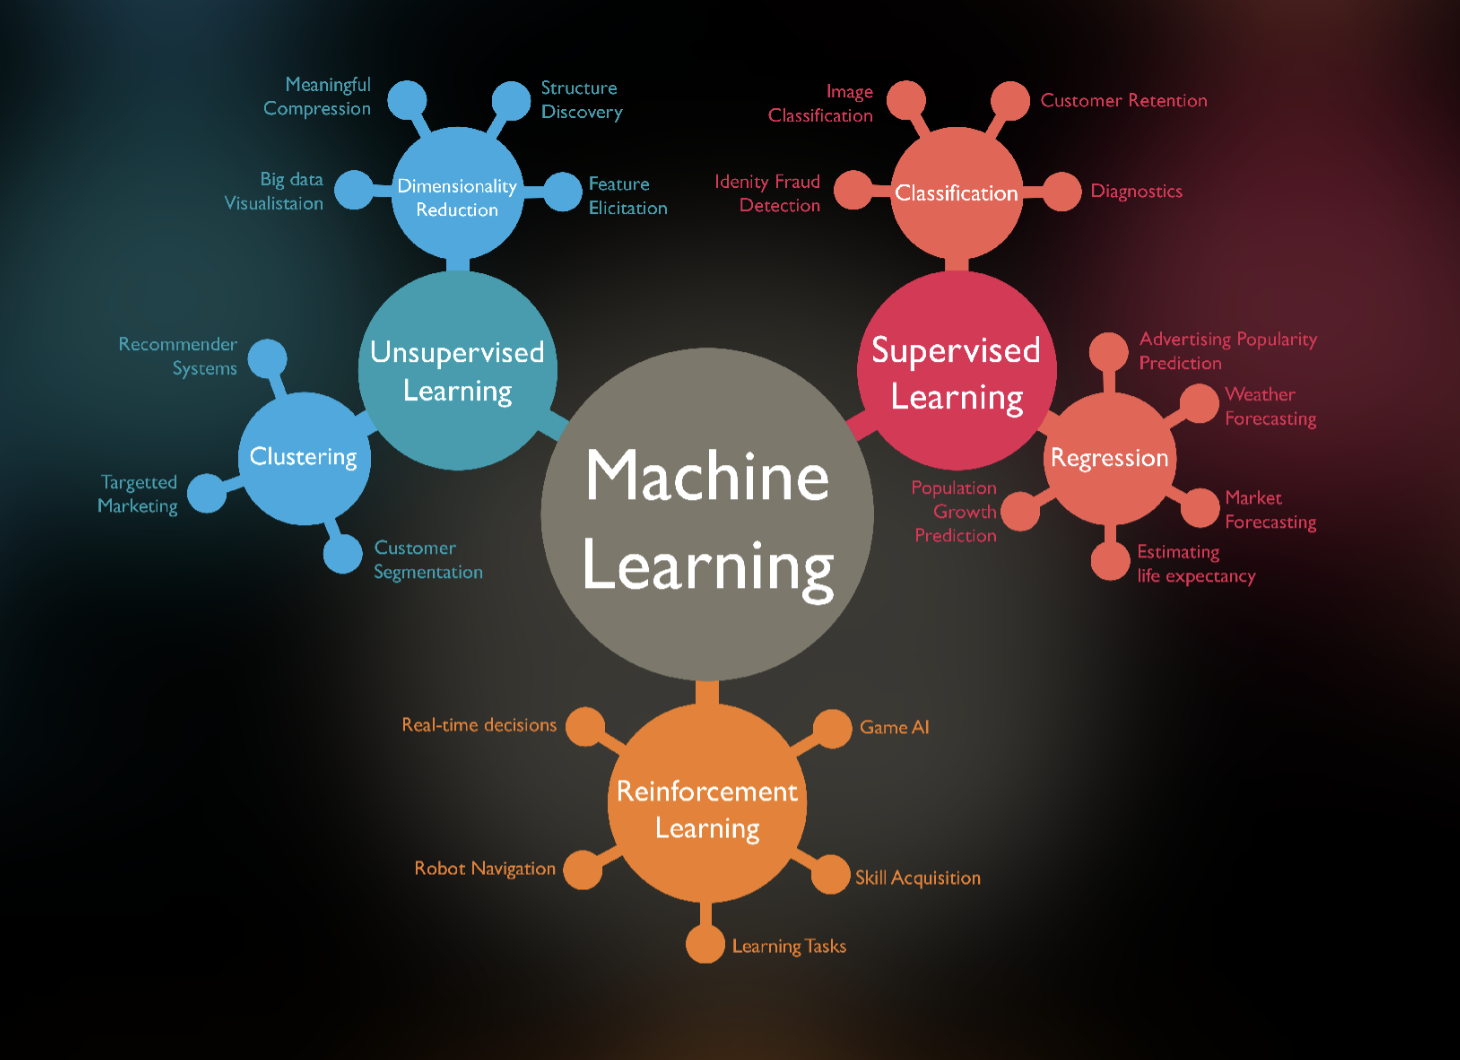

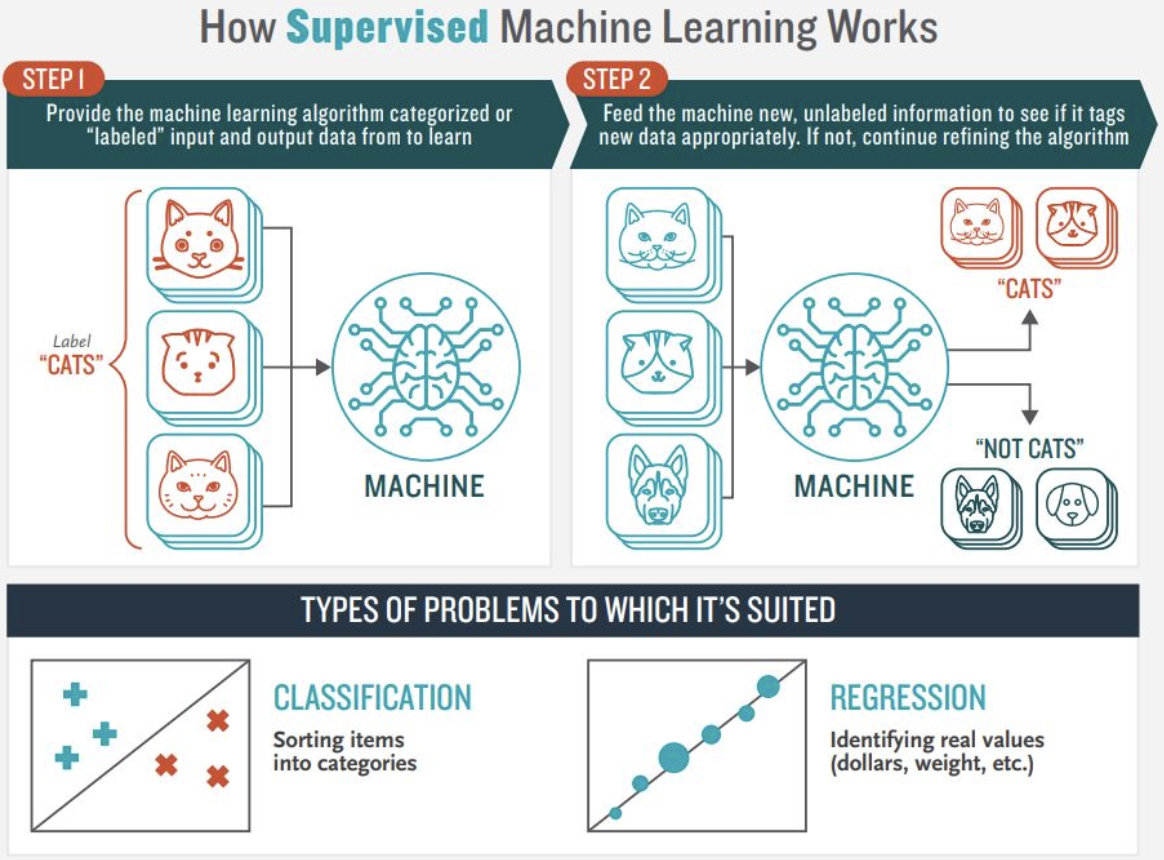

# Random forest is just one example of a supervised ML algorithm


# Go to: https://scikit-learn.org/stable/index.html

### This is the documentation page for scikit-learn, one of the most popular machine learning libraries for python. We will be using scikit-learn today. If you click 'User Guide' you will see a list of ml models included in scikit-learn. The random forest model is under *User Guide* --> *1. Supervised learning* --> *1.11 Ensemble methods* --> *1.11.2 forests of randomized trees*. 

### Key takeaway: random forest is just one (popular) example of a supervised ml model 

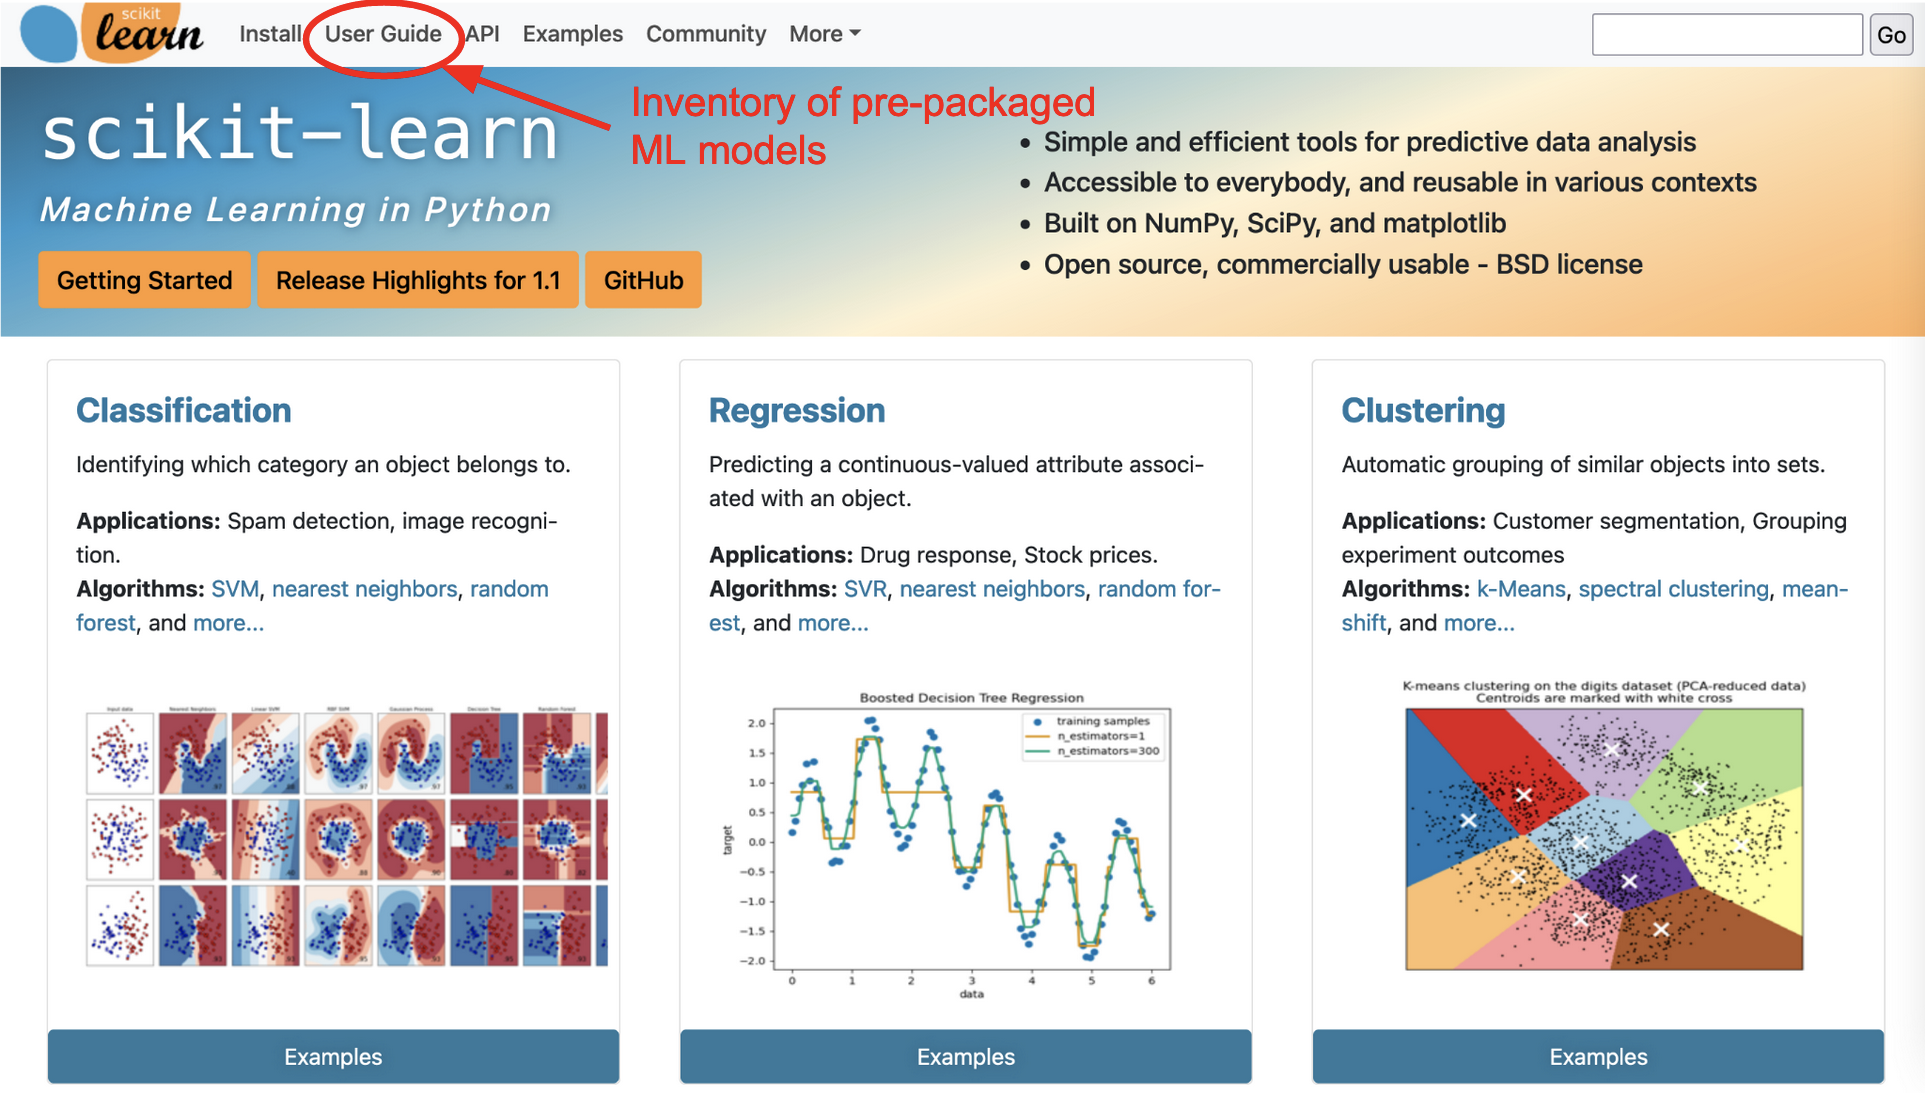

So when is machine learning a good fit for your research? If you have a large dataset that needs to be separated into categories, or you are trying to understand a trend in a dataset that there doesn't exist formal theory for, then machine learning might be a good fit for your problem. But note that your trained ML model will only be as good as the data you give it! You still need to be smart about the data you train your model with. This will become more apparent when we talk about interpreting your model's output later on today. 


# A quick note on terminology

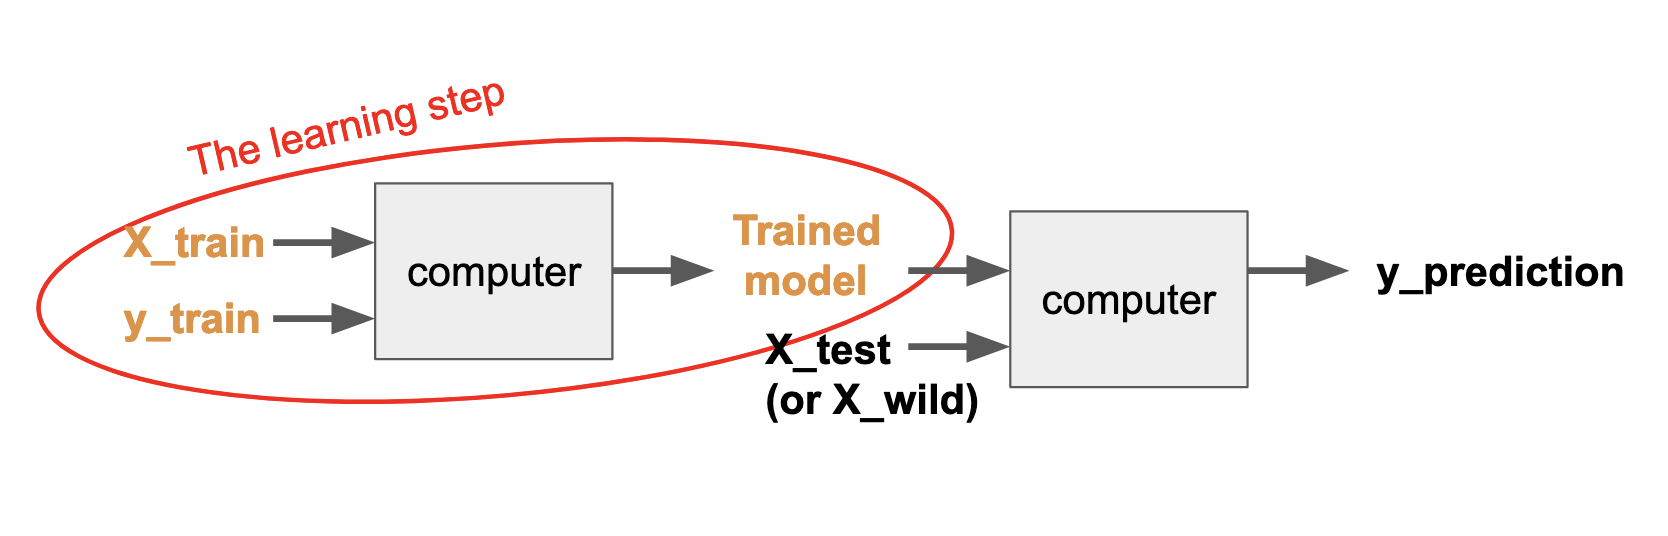

In machine learning we talk about the *features* X (capital since it's a vector a quantities) and the *response* y (a single value -- the value we are trying to accurately predict). Sometimes X and y are referred to as something else (some people refer to y as the target and/or X as the parameters). For simplicity let's consider a regression task -- for example, let's say we want to train a model to predict housing prices based on features like number of rooms, median income of the area, etc. 

# Regression example: California housing prices

In [ ]:
#from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

#### Optional install/import to speed up scikit-learn algorithms (not super important today, but good to know for the future)

In [ ]:
#!pip install scikit-learn-intelex

In [ ]:
#from sklearnex import patch_sklearn
#patch_sklearn()

## Our motivating question


### *What features of a house are most important in predicting it's market value?*

#### We will consider location features as well as physical characteristics of the house

## Exploring the data

To start, we'll use a dataset of california housing prices by census block. In other words, we have a dataset of a number of aggregate features for that census block -- for example, the average number of bedrooms of a house in that census block, or the median income of residents in that block.  We want to build a model that, based on these features, predicts the median house value for that census block. 

This particular dataset is readily available on the internet via sklearn.datasets

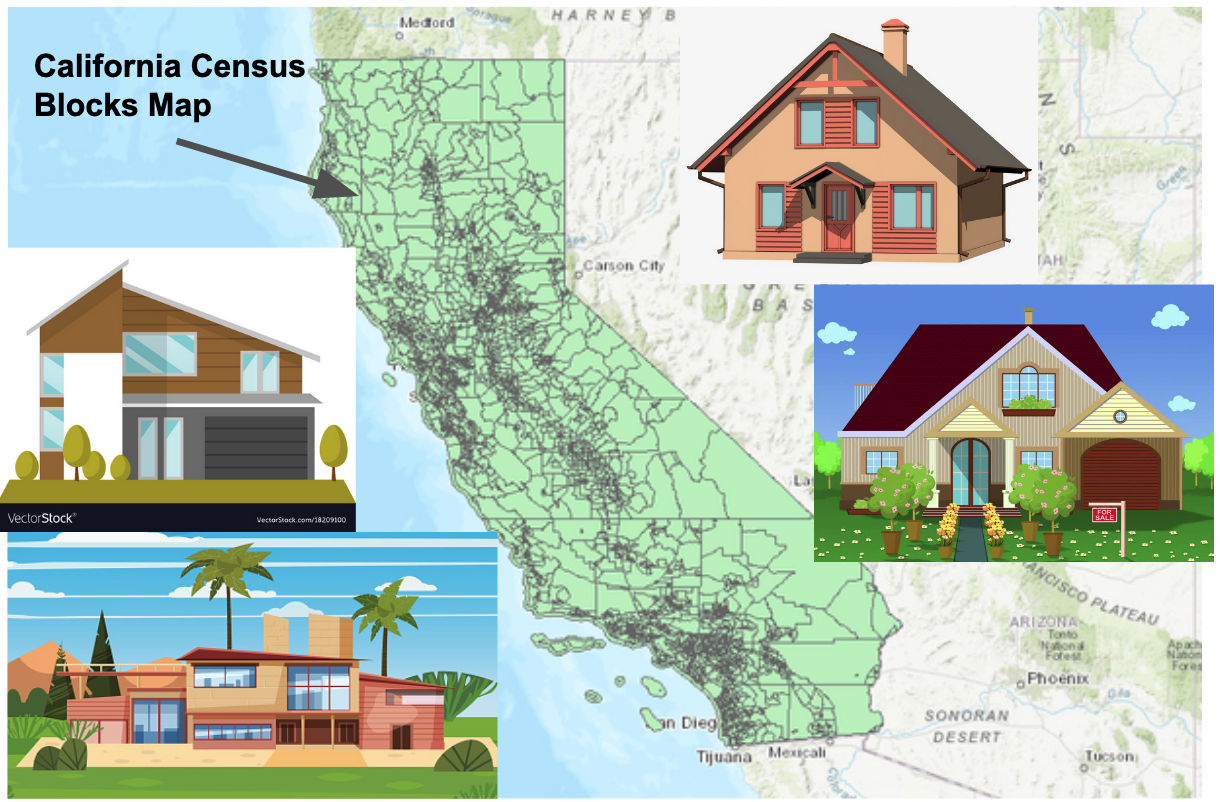

In [ ]:
##Loading in the data

dat = pd.read_csv('/Users/samanthalapp/Desktop/demystifying-machine-learning-2022/data/CalifHousingPrices.csv').drop('Unnamed: 0', axis = 1)

df = dat.copy()


In [ ]:
df

### Next, lets visualize our data to get a sense of what we're working with

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(17,5))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue = 'MedHouseVal', ax=axs[0])
sns.kdeplot(data=df, x='MedHouseVal', ax=axs[1]);
sns.histplot(data = df, x = 'HouseAge', ax = axs[2])

## Splitting the data into training and test/validation sets

In [ ]:
X = df.drop('MedHouseVal', axis = 1)   #X represents our features
y = df.MedHouseVal           #y represents our response, or target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### The line above split our total dataset (X,y) into two subsets: the training dataset (X_train, y_train) and the test dataset (X_test, y_test). The test_size argument determines what fraction of the total dataset you want to set aside to be your test set. 

## Checkpoint #1

Verify that the size of the test dataset is in fact 1/3 of the total dataset (X,y).

In [ ]:
## your code here

Note that we now are going to train our model with 66% of the data and test/validate the model performance with the remaining 33% of the data. 

(Note that we could have chosen a different split, for example training on 75% of the data and testing with the remaining 25%, if we had changed the argument test_size = 0.25.)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time

forest = RandomForestRegressor(min_samples_leaf = 9, n_estimators = 100, random_state=42)
forest.fit(X_train, y_train)

#### If you're wondering 'what is random_state'?, check out this stack overflow post: https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn. In short, setting random_state = some number will ensure that you get the same result every time you run the code. This is an important for reproducibility. A lot of people use random_state = 0 or random_state = 42. The particular number (0 or 42 for example) doesn't really matter, it's just a label for a particular random state. 

In [ ]:
## This line gets the model's prediction of responses y_pred based on X_test (the data the model was not trained on)

y_pred = forest.predict(X_test)

### We can use a number of different metrics to score our model's performance. Today we will use mean squared error (MSE):



<div>
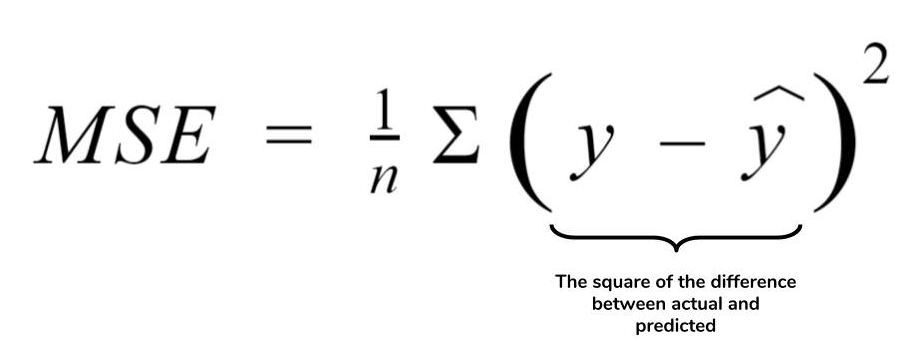
</div>


In [ ]:
## sklearn has a number of prepackaged metric functions available: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

## y_test is the ground truth, y_pred is our prediction

## Checkpoint #2
The more data we have, the better the model might do, so why do we split up our data? In the cells below, find the MSE between what our model predicts on the *training* set (i.e. forest.predict(X_train)) and y_train. Is this 'training score' greater or less than the test score above? 

In [ ]:
## your code here

It's important to note that the test score is usually what you'll be interested in. You want to know how the model did on data it hasn't seen before, not on the data you trained it with! 

The reason why we split the data into train and test sets is to avoid over-fitting and under-fitting. We measure the performance of the model based on the test-score. A low MSE test-score tells us that we are neither under-fitting nor over-fitting, and that the trends learned in the training set generalize well when the model sees new data. 

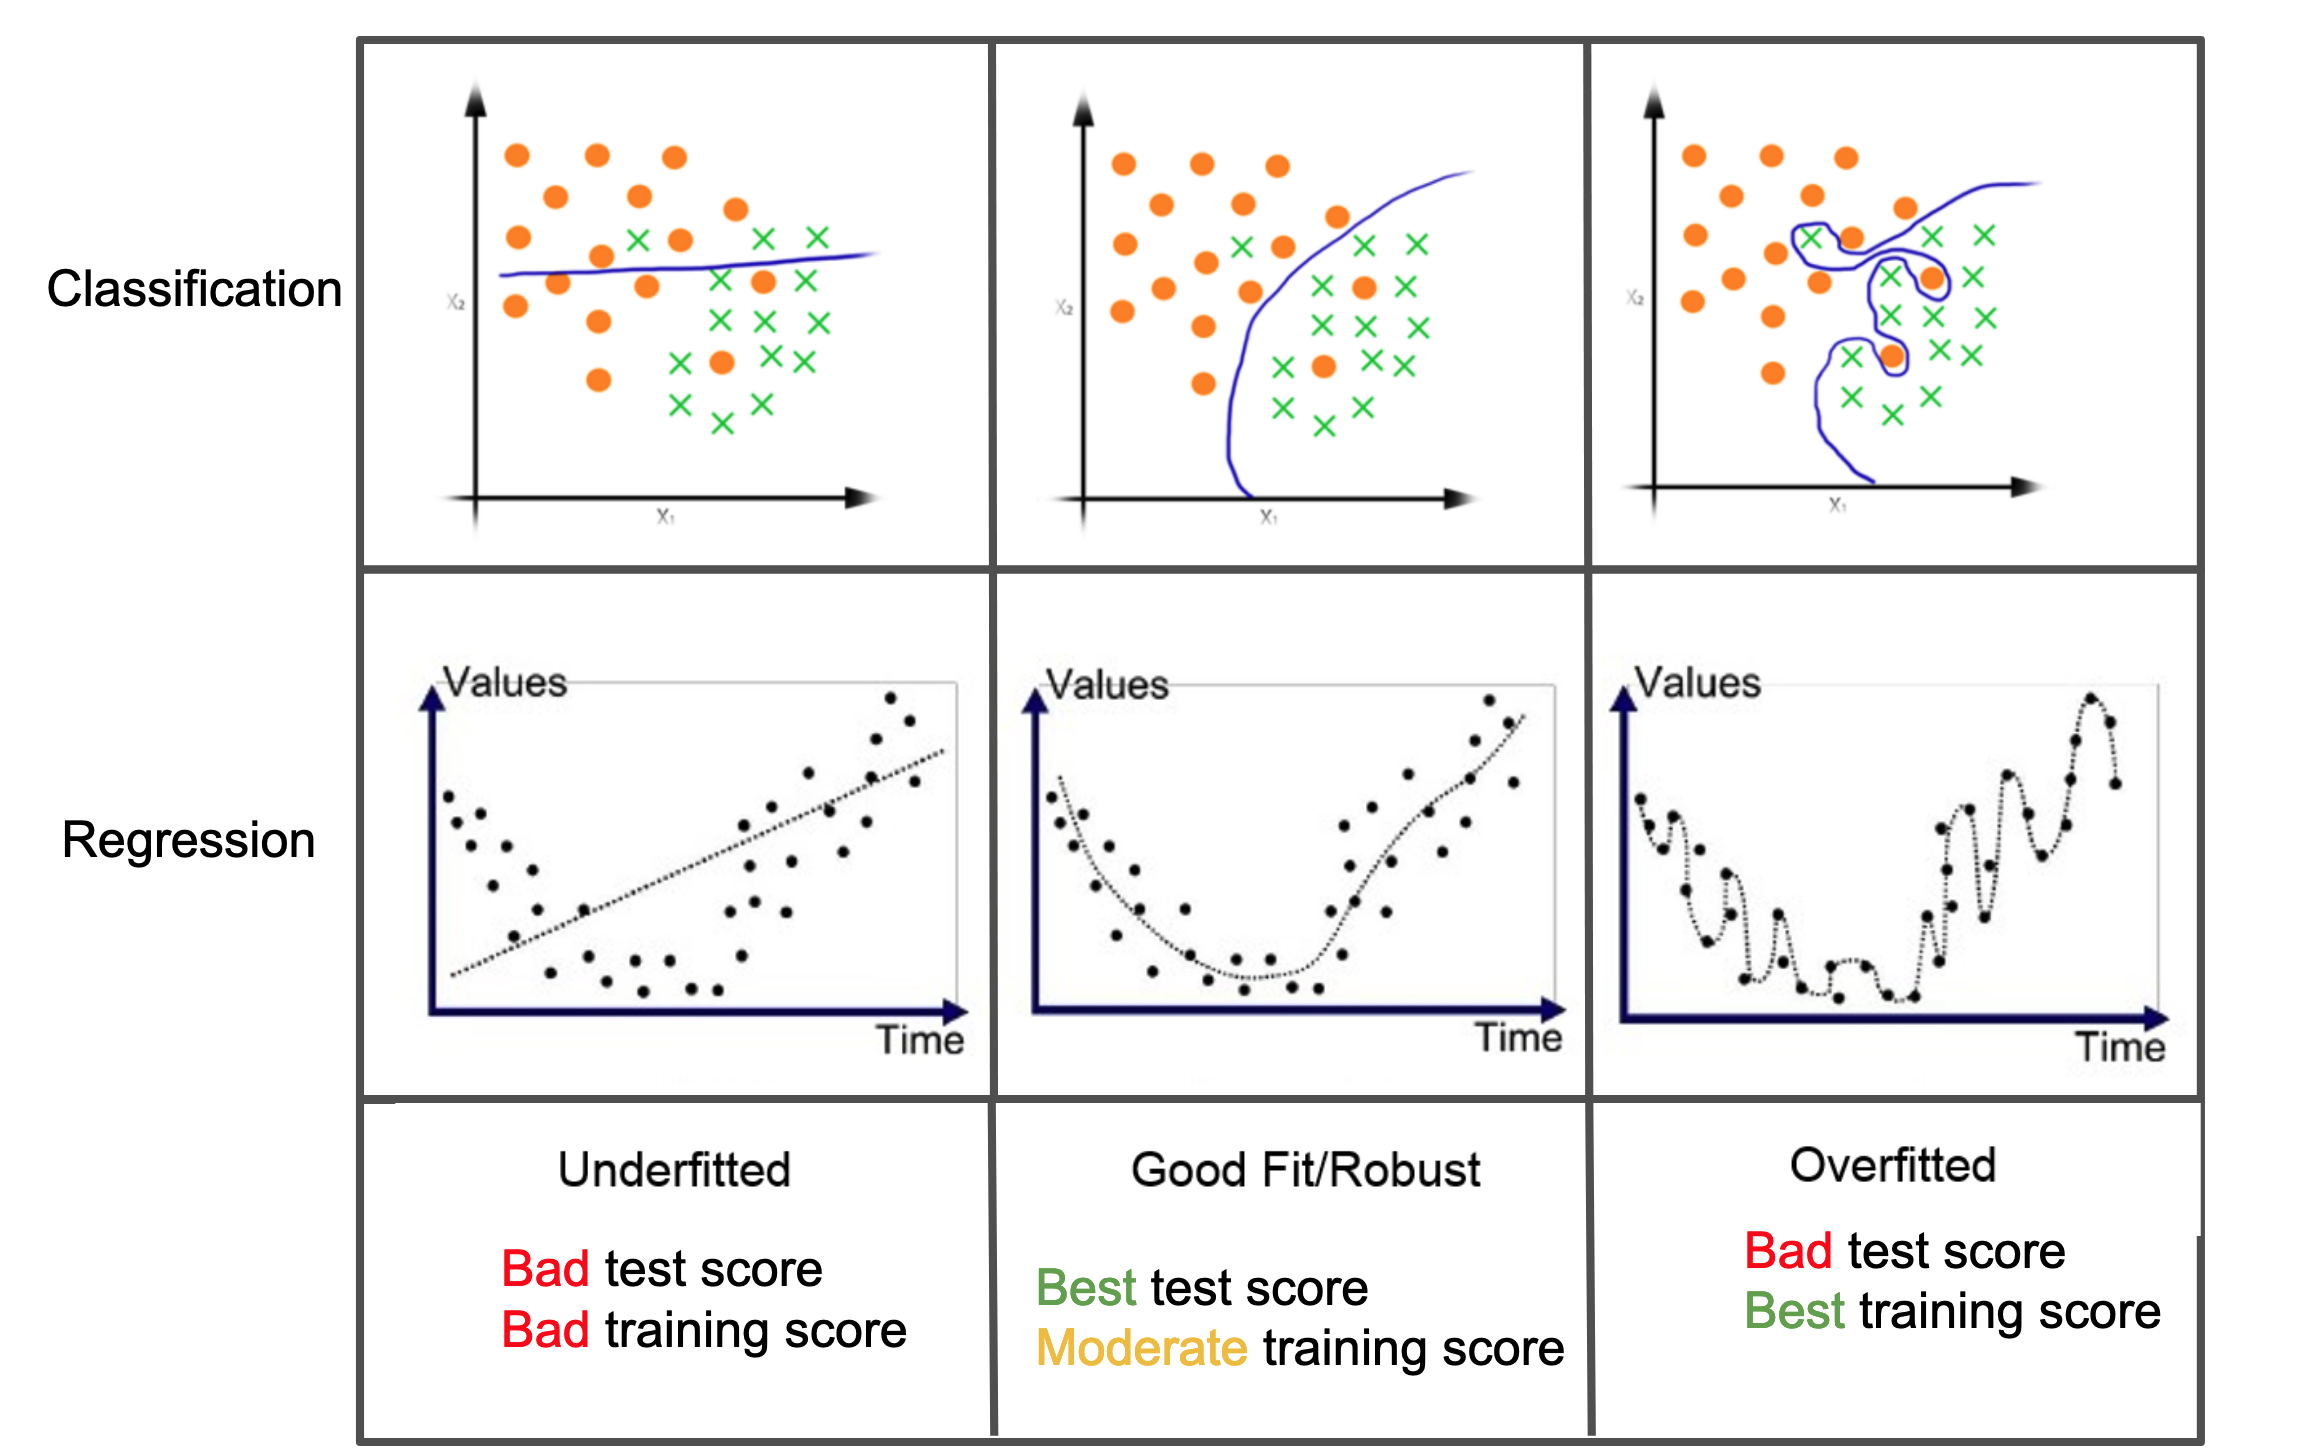

### How can we improve the model (lower the test MSE)?

### Answer: tune the hyperparameters a.k.a Cross Validation!


### But wait, what are hyperparameters???

### Before we explain hyperparameters, let's make a detour and start to finally explain what random forest is doing 'under the hood'. Until now, we've just implemented it.

### But first, a sneak peak. Why is it called a random forest? Let's start by explaining the 'forest' part. 


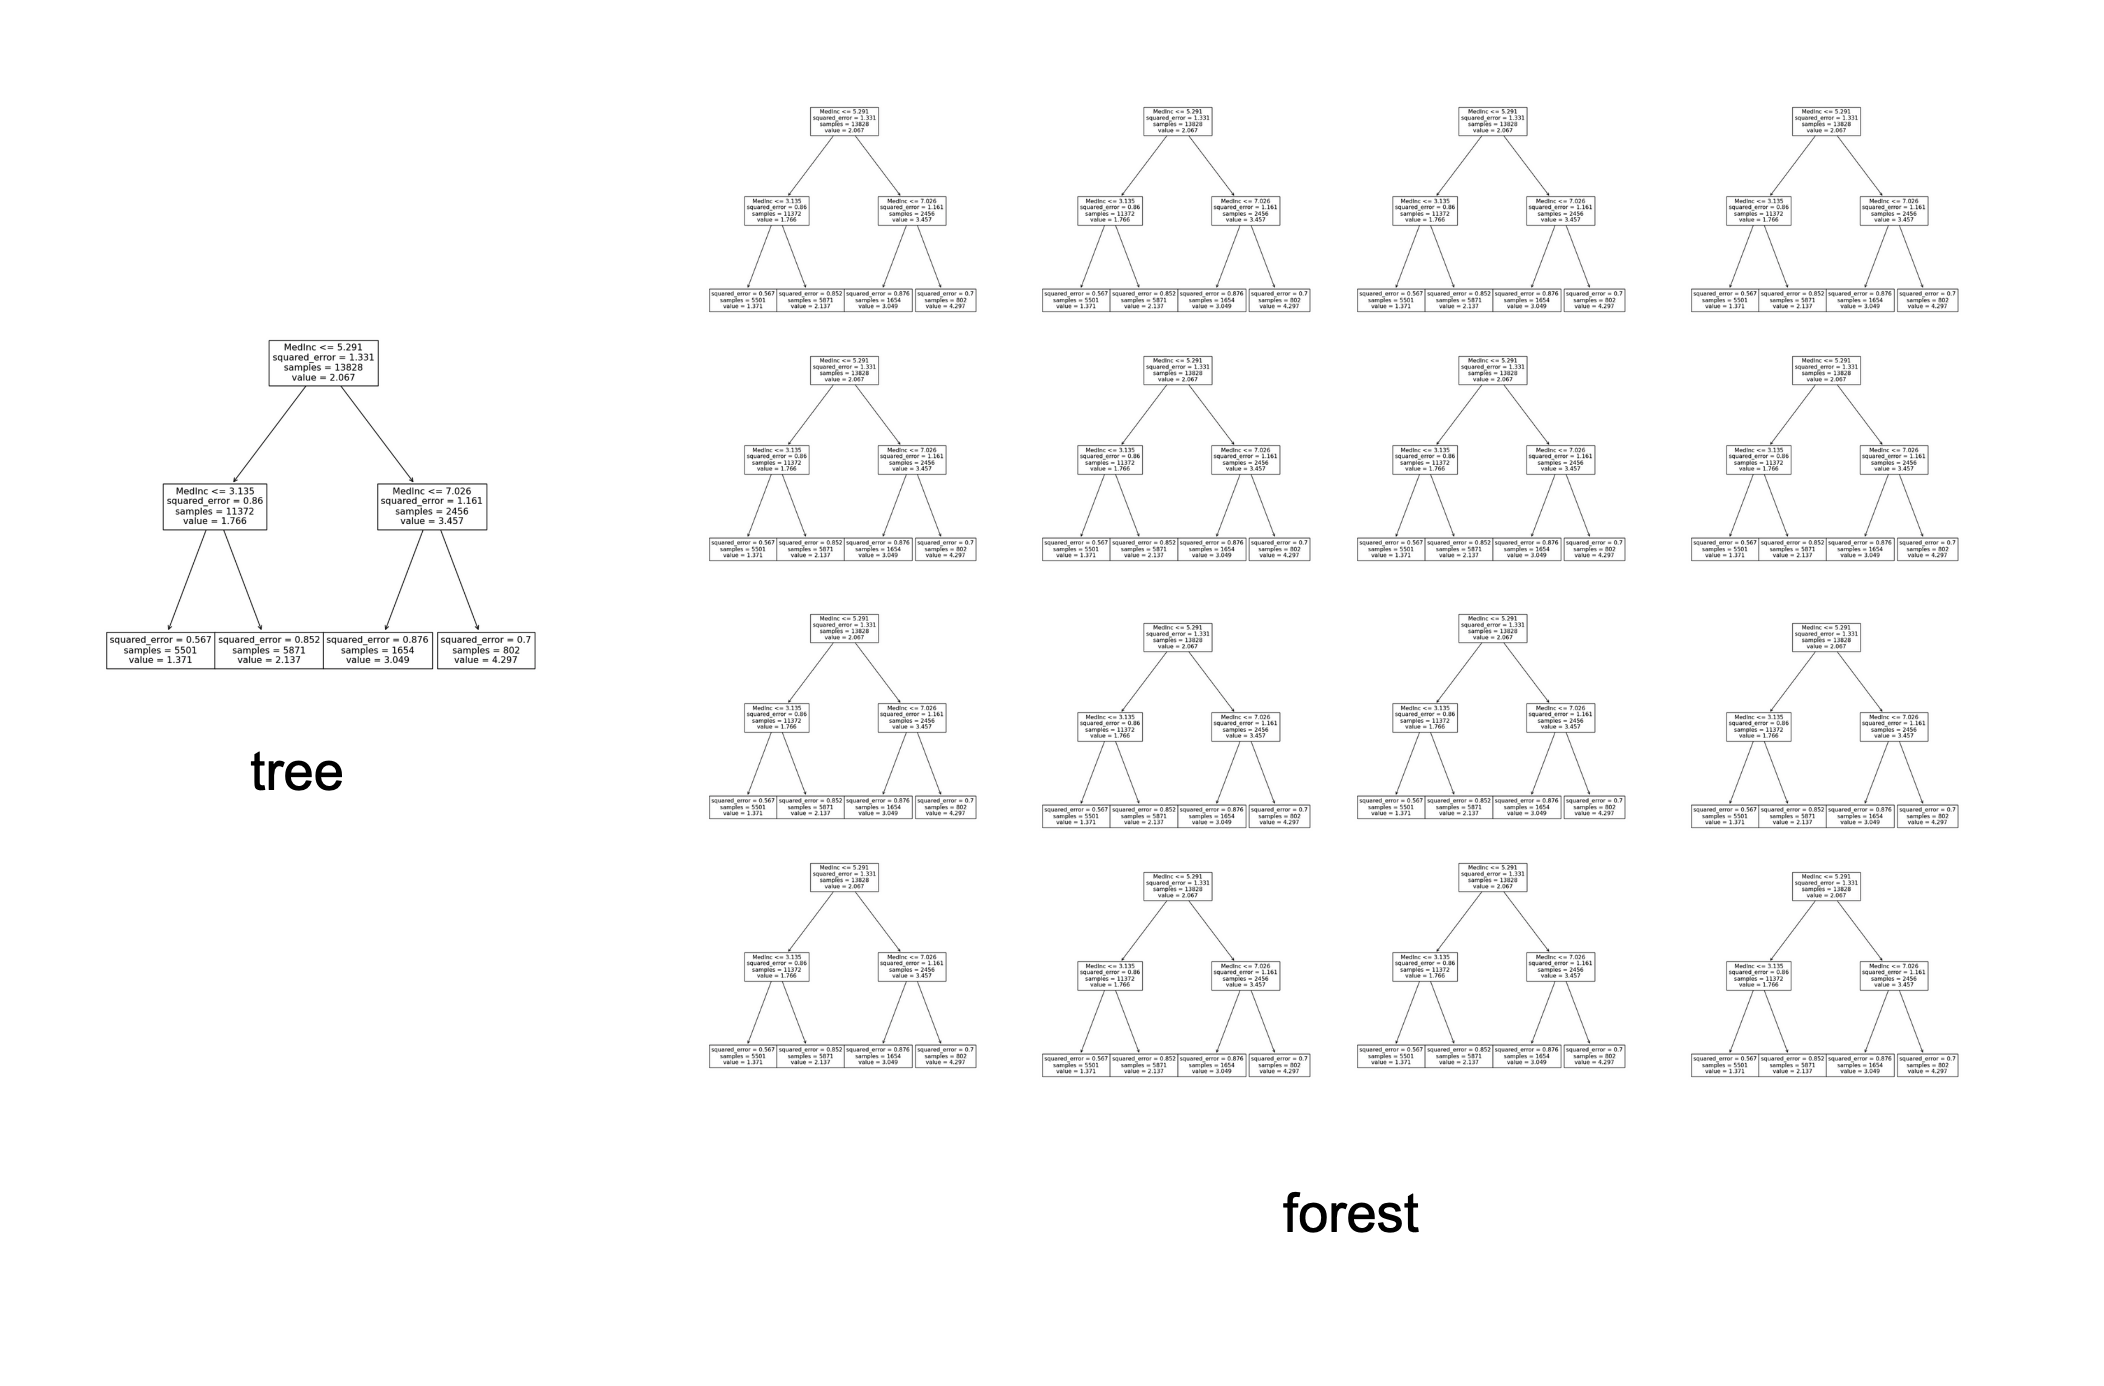

### For now ignore the 'random' part of the name. A random forest is ultimately just a *collection of decision trees*. 

### The step from decision tree to random forest will be relatively easy to understand after today. The trickier part (at least I've found) is understanding how a single decision tree works, and so we will spend a good chunk of today gaining intuition for whats going on in a single decision tree. The fundamental unit of a decision tree is the *binary split*, and so let's work on understanding that piece first.

## Understanding decision trees: binary splits

*I've modelled this section after a piece online: https://www.kaggle.com/code/jhoward/how-random-forests-really-work. The author of that piece focuses on a classification example -- if you'd like to see this binary split/decision tree demonstration for classification I recommend you check it out at the link!*

A random forest is ultimately a collection of *decision trees*, and the fundamental unit of the decision tree is the *binary split*. Let's explore what a binary split is using our california housing dataset. Let's start with a very simple model for predicting median house value by saying blocks with average house age less than 10 years old are more valuable than those with average house age older than 10 years old (this isn't the best assumption, but its a simple start!)

We'll implement our simple model using a binary split. We split the data into two groups: one where mean house age is less than or equal to 10 years, and one where the mean house age is greater than 10 years. Then we will take the mean of the target (median house value) in each group.

In [ ]:
df = dat.copy()
df

In [ ]:
## In this cell we set the threshold and add a boolean column to our dataframe that is True if HouseAge>threshold
## and False otherwise

threshold = 10 #years
df['HouseAgeOverThresh'] = df.HouseAge>threshold

In [ ]:
## In this cell, we split the data into the observations with HouseAgeOverThresh == True and those with 
## HouseAgeOverThresh == False, then take the mean of MedHouseVal in each of these two groups.

means = df[['HouseAgeOverThresh', 'MedHouseVal']].groupby('HouseAgeOverThresh', as_index = False).mean()

## The mean of MedHouseVal in each of the groups is then assigned to a variable

UnderThreshPred = means[means.HouseAgeOverThresh == False].MedHouseVal.to_numpy()[0]
OverThreshPred = means[means.HouseAgeOverThresh == True].MedHouseVal.to_numpy()[0]

In [ ]:
## This is the value we will assign to all observations (rows in the dataframe) that have HouseAge < threshold
UnderThreshPred

In [ ]:
## This is the value we will assign to all observations that have HouseAge > threshold
OverThreshPred

In [ ]:
## This cell adds a new column to the dataframe with the prediction value based on our simple split

def assign_preds(over_threshold, UnderPred, OverPred):
    if over_threshold == True:
        return OverPred
    if over_threshold == False:
        return UnderPred

df['PredMedHouseVal'] = df.apply(lambda x: assign_preds(x.HouseAgeOverThresh, UnderThreshPred, OverThreshPred), axis = 1)
    

In [ ]:
## lets check to see how well our simple model predicted MedHouseVal:

print('MSE = ')
mean_squared_error(df.MedHouseVal, df.PredMedHouseVal)

### And that is a binary split! 
### But, here are the key questions (that will lead us into building a *decision tree*):

### 1. Does splitting on a different feature lead to a better MSE?

### 2. Where do I split a particular feature (i.e. what threshold do I choose) to ensure I'm getting the best MSE split for that feature?

## Decision trees: a sequence of optimized binary splits

In [ ]:
## A reminder though: we have other features that we could split on besides HouseAge! 
## Key question: Does splitting on a different feature lead to a better MSE?

print('Available features:')

df.columns.to_list()

In [ ]:
## This function generalizes what we did above so that we can choose both the feature and the theshold for that feature

def score_split(feature, threshold):
    df = dat.copy()
    new_col_name = feature+'OverThresh'
    df[new_col_name] = df[feature]>=threshold
    means = df[[new_col_name, 'MedHouseVal']].groupby(new_col_name, as_index = False).mean()
    if means[means[new_col_name] == False].MedHouseVal.shape[0] == 0:
        UnderThreshPred = 0
    else:
        UnderThreshPred = means[means[new_col_name] == False].MedHouseVal.to_numpy()[0]
    if means[means[new_col_name] == True].MedHouseVal.shape[0] == 0:
        OverThreshPred = 0
    else:
        OverThreshPred = means[means[new_col_name] == True].MedHouseVal.to_numpy()[0]
    df['PredMedHouseVal'] = df.apply(lambda x: assign_preds(x[new_col_name], UnderThreshPred, OverThreshPred), axis = 1)
    
    return mean_squared_error(df.MedHouseVal, df.PredMedHouseVal)
    
    

In [ ]:
score_split('HouseAge',10)

In [ ]:
score_split('AveRooms',3)

In [ ]:
## In this cell, I calculate the median value of each of the features. I do this so that we can make a reasonable
## guess for what a good split might be (i.e. what threshold to choose)

feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
medians = dict(df[feature_names].median())
medians

In [ ]:
score_split('MedInc',6)

In [ ]:
%%capture
pip install ipywidgets

In [ ]:
## In this cell I code up a slider function that will allow me to quickly change the threshold value and 
## see how the MSE changes

import ipywidgets as widgets
#interact(score_split, x= 10)
def toggle_threshold(feature):
    
    
    print('MSE = ')
    widgets.interact(feature = [feature],
             threshold = widgets.IntSlider(min = df[feature].min()+1, max = df[feature].max()-1,
                                           step = 1, value = medians[feature]))(score_split);

In [ ]:
toggle_threshold('HouseAge')

In [ ]:
%%time

score_split('HouseAge', 20)


In [ ]:
%%time
best_scores = {}

for feature in feature_names:#.drop('test'):
    if feature == 'Population':
        ## I'm rounding the values of each feature to speed up the search for the best split
        possible_splits = df[feature].round(-3).unique()
    else:
        ## Same here -- I just round different features to different places because of their different ranges
        possible_splits = df[feature].round(0).unique()
    scores = []
    for threshold in possible_splits:
        score = score_split(feature, threshold)
        scores.append((threshold, score))

    best = sorted(scores, key=lambda x: x[1])[0]
    best_scores[feature] = best

    

In [ ]:
## This cell fills the dictionary best_scores with the best threshold and corresponding score for a particular feature

best_scores[feature] = sorted(scores, key=lambda x: x[1])[0]

In [ ]:
best_scores

### The above dictionary gives the feature name, the best threshold on which to split, and the corresponding MSE score. Clearly median income has the best predictive power.

### Now let's go ahead and use the sklearn decision tree regressor and see what features it chooses to split on (it should be MedInc based on what we found above)

In [ ]:
X = df[feature_names]#.drop('test')]
y = df['MedHouseVal']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
reg = DecisionTreeRegressor(random_state = 42, max_depth = 2)
reg.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

plot_tree(reg, feature_names = feature_names, ax = ax);

The function plot_tree gives you an inverted tree -- we refer to the bottom-most row as the *leaves* of the tree.

### Now let's calculate the MSE for our decision tree model:

In [ ]:
pred = reg.predict(X_test)
print(mean_squared_error(pred, y_test))


Compare this test score with the test score we found initially with the full random forest. The full random forest clearly preforms better (MSE = 0.28 vs MSE = 0.76)! So how do we go from decision tree to random forest?

### So that's a decision tree!  But again, what are hyperparameters?

### The hyperparameters are the properties of the *tree itself*, for example how deep, or "tall", the tree can grow (max_depth), or the minimum number of observations that can be in each 'leaf' (min_samples_leaf).

### *Hyperparameters* are different from *parameters*. Hyperparameters set limits on the properties of a tree (or the forest, or the neural net -- it is a term that applies to all ML algorithms), while *parameters* are the features relevant to your problem (e.g. HouseAge, MedInc)

## Checkpoint #3

Play with some of the hyperparameters of a decision tree. Plot the corresponding tree and notice how the structure of the tree changes. For each change of the hyperparameters, also find the test score using the mean_squared_error() function we've used previously. We've covered a lot since the last checkpoint, so feel free to ask questions to me or the TAs! We'll give more time for this checkpoint.

To start, try changing the value of max_depth. If you make the tree 'taller' (max_depth larger), does the MSE get better or worse?

Another hyperparameters you might try playing with is min_samples_leaf, which sets a minimum number of samples required to be in a leaf node (the leaf node is the last split i.e. the 'top' of the tree)

In the 'parameters' section of the sklearn decision tree regressor documentation (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) they describe more hyperparameters available to you. Note that the header of 'parameters' is misleading in this case. They are parameters of the function DecisionTreeRegressor(), but they are *hyperparameters* of the tree itself! 



In [ ]:
## your code here

## If you wanted to, you could *manually* toggle the values of hyperparameters to optimize your model's performance. But there's a better way.

## Hyperparameter tuning the *easy* way: grid search and random search

Both grid search and random search are functions built into sklearn that perform something called *K-fold cross validation*. Below is a schematic of the process. But first we should discuss why you would want to do K-fold cross validation in the first place.

Above, we were attempting to optimize the hyperparameters by changing a hyperparameter value and checking the test MSE to see if we should keep that change. There's a problem with this process. Mainly, the problem is that we are using the test data (which we initially set aside so we could test the quality of the model later) to tune the model itself! In effect our model is 'seeing' the test data. That's not good!

This is where K-fold cross validation comes in. This process allows us to tune the hyperparameters using only the training data. We chop up the training data into K folds (the default is typically K = 5), and fit and score the model K times, using one of the folds as a 'test data' stand-in.

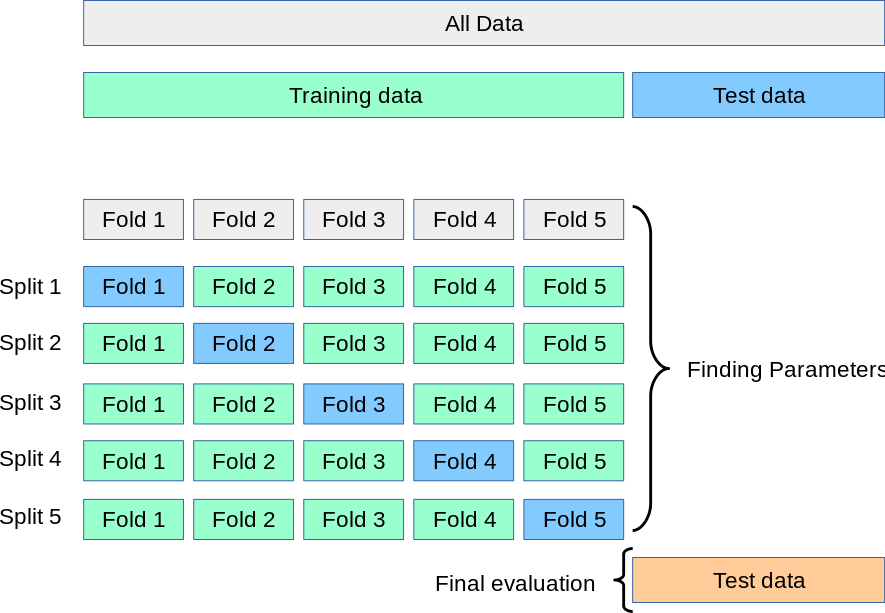

By performing K-fold cross validation, we leave our test data untouched until we want to produce a final test score! During grid or random search, K-fold cross validation is performed a number of times, each time for a different set of hyperparameter values that you specify. Basically grid or random search is a automated hyperparameter tuning function!

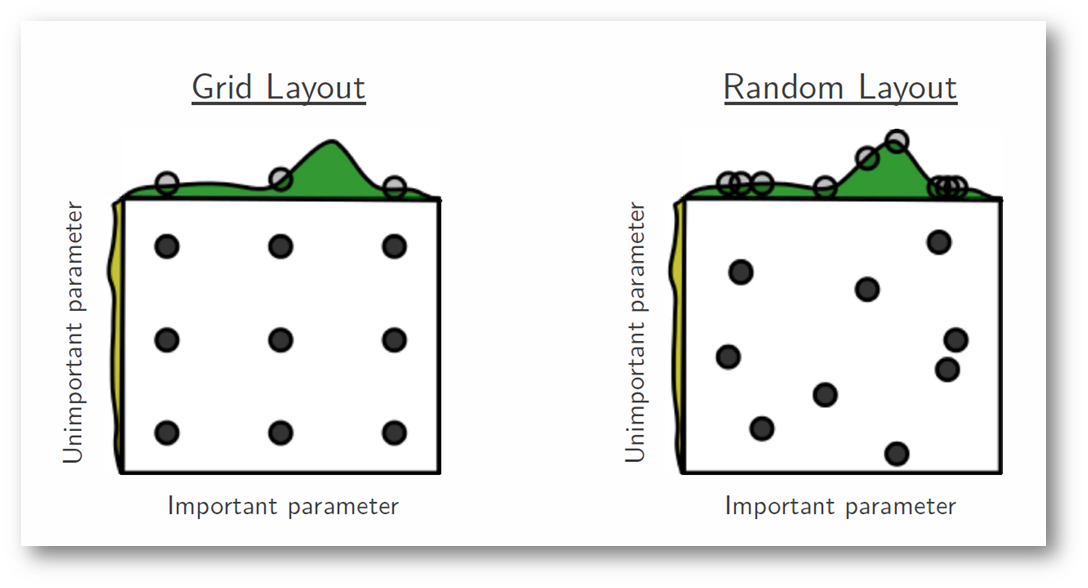

## Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
def getGridTunedModel( baseModel ):
        n_estimators = [100,500]
        random_state = 42
        max_samples = [0.5]
        min_samples_leaf = [1]
        
        grid = {'n_estimators': n_estimators,
                'min_samples_leaf': min_samples_leaf}
    
        
        model_tuned = GridSearchCV(estimator = baseModel, param_grid = grid,scoring = 'neg_mean_squared_error', verbose=1 , n_jobs = -1)
        return model_tuned

In [ ]:
%%time

rf = RandomForestRegressor(random_state = 42)
gsearch = getGridTunedModel(rf)
gsearch.fit(X_train,y_train)


In [ ]:
gsearch.cv_results_['mean_fit_time']
gresult = pd.DataFrame.from_dict(gsearch.cv_results_)
gresult

In [ ]:
best = gresult[gresult.rank_test_score == 1]
key = list(best.params.keys())[0]
best_params = dict(best.params)[key]
n_estimators = best_params['n_estimators']
min_samples_leaf = best_params['min_samples_leaf']
mean_test_score = best['mean_test_score']
std_test_score = best['std_test_score']


In [ ]:
rf = RandomForestRegressor(random_state = 42, n_estimators = n_estimators, min_samples_leaf = min_samples_leaf)
rf.fit(X_train, y_train)

In [ ]:
ypred = rf.predict(X_test)
mean_squared_error(ypred,y_test)

## Random search (recommended)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
def getRandomlyTunedModel( baseModel ):
        n_estimators = list(np.arange(100,800, 10))
        random_state = 42
        min_samples_leaf = list(np.arange(1,30,2))
        
        random_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf}

        model_tuned = RandomizedSearchCV(estimator = baseModel, param_distributions = random_grid, n_iter = 2, verbose=1, random_state=random_state ,scoring = 'neg_mean_squared_error', n_jobs = -1)
        return model_tuned

In [ ]:
%%time

rf = RandomForestRegressor(random_state = 42)
rsearch = getRandomlyTunedModel(rf)
rsearch.fit(X_train,y_train)


In [ ]:
rsearch.cv_results_['mean_fit_time']
rresult = pd.DataFrame.from_dict(rsearch.cv_results_)
rresult

In [ ]:
best = rresult[rresult.rank_test_score == 1]
key = list(best.params.keys())[0]
best_params = dict(best.params)[key]

n_estimators = best_params['n_estimators']
min_samples_leaf = best_params['min_samples_leaf']
mean_test_score = best['mean_test_score']
std_test_score = best['std_test_score']

In [ ]:
%%time
rf = RandomForestRegressor(random_state = 42, n_estimators = n_estimators, min_samples_leaf = min_samples_leaf)
rf.fit(X_train, y_train)

In [ ]:
ypred = rf.predict(X_test)
mean_squared_error(ypred,y_test)

## A forest of decision trees

Each tree is called an *estimator*. Let's see what one tree looks like within our random forest.

In [ ]:
fig2, ax2 = plt.subplots(figsize=(20,20))
plot_tree(forest.estimators_[0], ax = ax2);

That's one gnarly tree! Note that this is just one of the many estimators (trees) within the forest. Also note that the number of estimators is a hyperparameter for the random forest! i.e. you choose how big or small you want the forest to be. 

## A *random* forest of decision trees

So where does the *random* part of random forest come in? Imagine first that we have a single decision tree (like the one we created above). If we fit the decision tree again without changing anything, we'll get an identical tree. We would have a forest of identical trees, and that wouldn't help us improve our model! But here's the key: instead of giving each decision tree all the training data, we give it a *bootstrapped* sample. What does that mean? *Bootstrapping* is basically another name for sampling with replacement. To remind you of what that means, imagine that each line of our dataframe is a colored ball (to remind you what a line of our dataframe looks like, I've printed it out below).

In [ ]:
dat.head(5)

So imagine each line above as a colored/numbered ball below in the 'original sample'. By bootstrapping/sampling with replacement, we create a subset such that everytime we randomly choose a ball from the original sample, we 'put the ball back' in the original sample so that it can be drawn again. In other words, when we first draw a ball, we have 10 options. If we're sampling with replacement, we have 10 options on each subsequent draw (if we sample without replacement, we would have 9 options on the next draw, 8 on the next, and so on). 

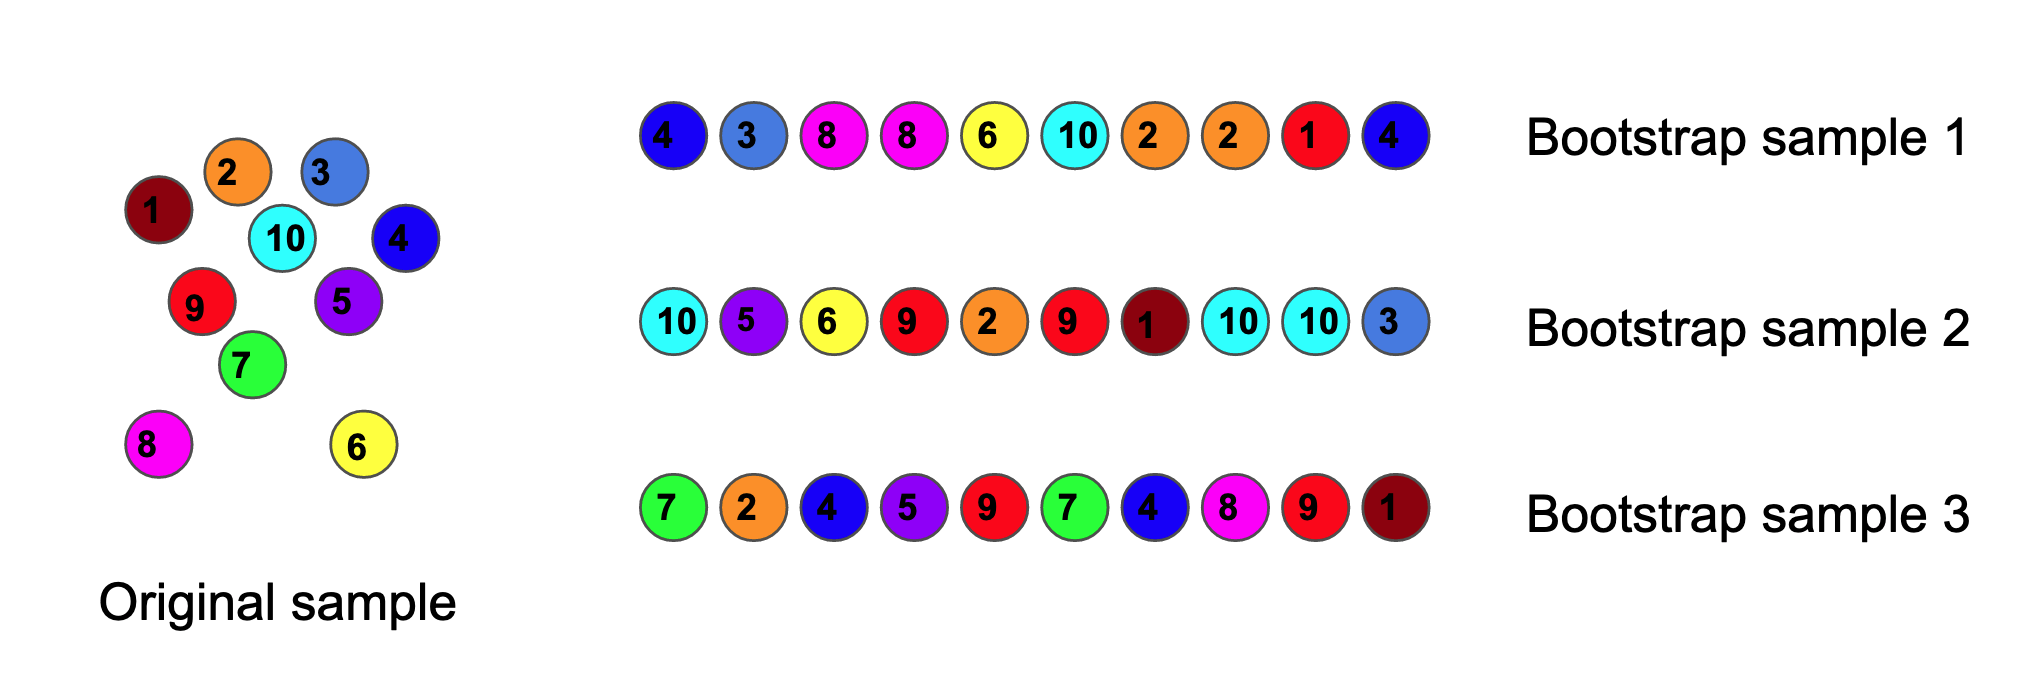

The effect of bootstrapping is that each tree sees a random portion of the training data, and is therefore uncorrelated with other trees. The final step of the random forest algorithm is *aggregation*. Once we have a forest of uncorrelated decision trees, we average the predictions of all the trees. That's the output of the random forest!

## As a review, here are the topics we've introduced so far:

1. splitting data into training and test/validation sets

2. Overfitting/Underfitting

3. binary splits

4. decision trees

5. hyperparameter tuning (using k-fold cross validation via grid or random search)

6. bagging ( = bootstrapping + aggregation)

7. putting it all together: random forest


## We now know how to code up a trained random forest model and tune it's hyperparameters!

## ...now what?

Prediction is just the beginning! Especially in science we want to know more about what else the model can tell us. You may have heard that machine learning is a black box. There are methods however to peak into the black box! We will consider something called feature imortance first. 





## Feature importance

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

*I suggest you google mean decrease in impurity (MDI) to learn more, but it's basically a measure of of how much a split on that particular feature improves the test score of the model*

## Below are topics that I suggest you explore on your own, especially if you are interested in interpreting the models you build

## Partial Dependence Plots (PDPs)

Partial dependence plots (PDPs) are a way of understanding how the value of some feature affects the prediction. It's one way of 'peaking into the black box'. One major caveat, however, is that PDPs rely on the assumption that features are not correlated. If your features are correlated, PDPs might lead to misleading results. 

This is a great resource to learn more about PDPs, as well as some of the formalism of ML in general:

https://christophm.github.io/interpretable-ml-book/pdp.html



## Accumulated Local Effects (ALE) Plots 

Accumulated local effects plots (ALE plots) came after PDPs, and have the key advantage that they do *not* assume that the features are correlated. The drawback is that since they are newer, they are tricky to implement (or at least I've found them tricky -- I'm currently working on creating ALE plots for my research). You can read more about them and how they differ from PDPs here: 

https://christophm.github.io/interpretable-ml-book/ale.html

I suggest that before you read about ALE plots that you have a decent understanding of PDPs. PDPs are somewhat easier to understand, and so understanding them provides a good foundation for understanding ALE plots. 